In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/content/drive/MyDrive/ml_datasets/twitter_sentiment_dataset/train.csv")
data

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


0    29720
1     2242
Name: label, dtype: int64


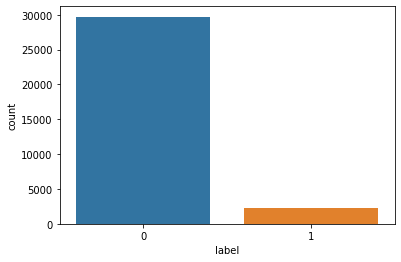

In [3]:
print(data['label'].value_counts())
sns.countplot(data = data, x= 'label')
plt.show()

In [4]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

## Cleaning Tweets

In [5]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [6]:
wordnet = WordNetLemmatizer()
def clean_tweets(df):
  tempArr = []
  for lines in df:
    tweet = re.sub('[^a-zA-Z]', ' ', lines)
    tweet = tweet.lower()
    tweet = tweet.split()
    tweet = [wordnet.lemmatize(word) for word in tweet if not word in set(stopwords.words('english'))]
    tweet = ' '.join(tweet)
    tempArr.append(tweet)
  return tempArr

In [7]:
cleaned_tweets = clean_tweets(data['tweet']) 
cleaned_tweets = pd.DataFrame(cleaned_tweets, columns = ['Cleaned_Tweets'])
cleaned_tweets

,Cleaned_Tweets
0,user father dysfunctional selfish drag kid dys...
1,user user thanks lyft credit use cause offer w...
2,bihday majesty
3,model love u take u time ur
4,factsguide society motivation
...,...
31957,ate user isz youuu
31958,see nina turner airwave trying wrap mantle gen...
31959,listening sad song monday morning otw work sad
31960,user sikh temple vandalised calgary wso condem...


In [8]:
data = pd.concat([data, cleaned_tweets], axis=1)
data.head()

,id,label,tweet,Cleaned_Tweets
0,1,0,@user when a father is dysfunctional and is s...,user father dysfunctional selfish drag kid dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,user user thanks lyft credit use cause offer w...
2,3,0,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in ...,model love u take u time ur
4,5,0,factsguide: society now #motivation,factsguide society motivation


In [9]:
from gensim.models import Word2Vec

In [111]:
tweets = data['Cleaned_Tweets'].values
tweet_words = [nltk.word_tokenize(tweet) for tweet in tweets]
len(tweet_words)

31962

In [23]:
model_train = Word2Vec(tweet_words, min_count=1)

In [25]:
words = model_train.wv.vocab
len(words.keys())

35126

In [102]:
model_train.wv.most_similar('vegan')

[('fitness', 0.9964632987976074),
 ('wellness', 0.9956665635108948),
 ('organic', 0.9952740669250488),
 ('exercise', 0.9936970472335815),
 ('health', 0.9933074712753296),
 ('food', 0.9928768873214722),
 ('weightloss', 0.992344319820404),
 ('fit', 0.9922270178794861),
 ('hippy', 0.9917774200439453),
 ('yoga', 0.9912245869636536)]

In [219]:
def get_vec(sent):
  vector = []
  sent = sent.split(' ')
  for word in sent:
    try:
      vector + vector.append(model_train.wv[word])
    except Exception:
      pass
  vector = [item for list in vector for item in list]
  return vector

In [220]:
data['vector'] = data['Cleaned_Tweets'].apply(lambda x: get_vec(x))
data.head()

,id,label,tweet,Cleaned_Tweets,vector
0,1,0,@user when a father is dysfunctional and is s...,user father dysfunctional selfish drag kid dys...,"[0.24277982, 0.7999059, -0.563982, 0.4066299, ..."
1,2,0,@user @user thanks for #lyft credit i can't us...,user user thanks lyft credit use cause offer w...,"[0.24277982, 0.7999059, -0.563982, 0.4066299, ..."
2,3,0,bihday your majesty,bihday majesty,"[0.23568897, 0.78615415, 0.05332668, 0.5587378..."
3,4,0,#model i love u take with u all the time in ...,model love u take u time ur,"[-0.47522303, 0.7604893, 0.22848581, -0.418362..."
4,5,0,factsguide: society now #motivation,factsguide society motivation,"[0.01730091, 0.010912114, -0.024091711, -0.008..."


In [233]:
X_test = data['vector'].to_numpy()
X_test = X_test.reshape(-1, 1)
y_test = data['label'].to_numpy()
y_test = y_test.reshape(-1, 1)
X_test.shape, y_test.shape

((31962, 1), (31962, 1))

## Test Data

In [14]:
test_data = pd.read_csv("/content/drive/MyDrive/ml_datasets/twitter_sentiment_dataset/test.csv")
test_data.head(3)

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...


In [15]:
cleaned_tweets_test= clean_tweets(test_data['tweet']) 
cleaned_tweets_test = pd.DataFrame(cleaned_tweets_test, columns = ['Cleaned_Tweets'])
cleaned_tweets_test

,Cleaned_Tweets
0,studiolife aislife requires passion dedication...
1,user white supremacist want everyone see new b...
2,safe way heal acne altwaystoheal healthy healing
3,hp cursed child book reservation already yes h...
4,rd bihday amazing hilarious nephew eli ahmir u...
...,...
17192,thought factory left right polarisation trump ...
17193,feeling like mermaid hairflip neverready forma...
17194,hillary campaigned today ohio omg amp used wor...
17195,happy work conference right mindset lead cultu...


In [16]:
test_data = pd.concat([test_data, cleaned_tweets_test], axis=1)
test_data.head()

,id,tweet,Cleaned_Tweets
0,31963,#studiolife #aislife #requires #passion #dedic...,studiolife aislife requires passion dedication...
1,31964,@user #white #supremacists want everyone to s...,user white supremacist want everyone see new b...
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe way heal acne altwaystoheal healthy healing
3,31966,is the hp and the cursed child book up for res...,hp cursed child book reservation already yes h...
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",rd bihday amazing hilarious nephew eli ahmir u...


In [17]:
test_tweets = test_data['Cleaned_Tweets'].values
test_tweet_words = [nltk.word_tokenize(tweet) for tweet in test_tweets]
len(tweet_words)

31962

In [27]:
model_test = Word2Vec(test_tweet_words, min_count=1)

In [28]:
len(model_test.wv.vocab.keys())

23823

In [20]:
model_test.wv.most_similar('passion')

[('light', 0.9993647336959839),
 ('success', 0.9992644786834717),
 ('yummy', 0.9992051720619202),
 ('choice', 0.9991477727890015),
 ('rain', 0.9991054534912109),
 ('touch', 0.9990699291229248),
 ('positivity', 0.9990585446357727),
 ('friendship', 0.9990372657775879),
 ('inspire', 0.9989468455314636),
 ('goodvibes', 0.9989348649978638)]

In [151]:
test_data['vector'] = test_data['Cleaned_Tweets'].apply(lambda x: get_vec(x))
test_data.head()

,id,tweet,Cleaned_Tweets,vector
0,31963,#studiolife #aislife #requires #passion #dedic...,studiolife aislife requires passion dedication...,"[0.005139549262821674, 0.010346638970077038, -..."
1,31964,@user #white #supremacists want everyone to s...,user white supremacist want everyone see new b...,"[0.24277982115745544, 0.7999058961868286, -0.5..."
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe way heal acne altwaystoheal healthy healing,"[0.1630653291940689, 0.1661081463098526, -0.16..."
3,31966,is the hp and the cursed child book up for res...,hp cursed child book reservation already yes h...,"[0.0059814173728227615, 0.0022955050226300955,..."
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",rd bihday amazing hilarious nephew eli ahmir u...,"[0.08532458543777466, 0.12929828464984894, -0...."


In [143]:
len(test_data['vector'][1])

9

In [137]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

In [139]:
grid_params = {
    'alpha': [1, 1e-1, 1e-2, 1e-4, 1e-5, 1e-7, 1e-8, 1e-10]
}

In [138]:
clf.get_params().keys()

dict_keys(['alpha', 'class_prior', 'fit_prior'])

In [140]:
clf = MultinomialNB()
tuning = GridSearchCV(clf, grid_params, cv=5)

In [234]:
#train_vector = np.array(data['vector'], dtype=np.float)
# train_label = np.array(data['label'], dtype=np.int32)
tuning.fit(X_test, y_test)
#len(data['vector'].to_numpy())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: setting an array element with a sequence.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: setting an array element with a sequence.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: setting an array element with a sequence.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

ValueError: ignored